# Nissen et al., 2023: Severe 21st-century OA in Antarctic MPAs
#
# Fig. 7: evolution of lysocline depth over time in MPAs
#
# this script requires post-processed model output

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from matplotlib import cm
from netCDF4 import Dataset, MFDataset
import pandas as pd
from scipy.io import netcdf
from pylab import *

In [3]:
#------
# MODEL INFO
#------

# path to carbonate chemistry data (names of *nc files are hard-coded in 'get_data()' function below)
path_to_data = '/global/homes/c/cnissen/ARCHIVE_Nissen2023_NatureComms_OA_in_MPAs/nc_files/'

savepath     = '/global/cfs/cdirs/m4003/cnissen/Plots/Paper_OA_in_MPAs/Fig_7/'
# check existence of paths
if not os.path.exists(savepath):
    print ('Created '+savepath)
    os.makedirs(savepath)
    
savepath2     = savepath+'eps/'
# check existence of paths
if not os.path.exists(savepath2):
    print ('Created '+savepath2)
    os.makedirs(savepath2)
    
#---
# load mesh info
#---

path_mesh = '/pscratch/sd/c/cnissen/'
file_mesh = 'Nissen2022_FESOM_REcoM_mesh_information_corrected_20220910.nc'

f1 = Dataset(path_mesh+file_mesh) #xr.open_dataset(path+file1)
lat_model      = f1.variables['lat'][:]
lon_model      = f1.variables['lon'][:]
zlevs    = f1.variables['zlevs'][:]
cavities = f1.variables['cavity'][:]
topo     = f1.variables['topo'][:]
area     = f1.variables['cell_area'][:]
volume   = f1.variables['cell_volume'][:]
f1.close()
print(lat_model.shape)

ind_no_cavity = np.where(cavities==0)[0]
ind_cavities = np.where(cavities==1)[0]


Created /global/cfs/cdirs/m4003/cnissen/Plots/Paper_OA_in_MPAs/Fig_7/
Created /global/cfs/cdirs/m4003/cnissen/Plots/Paper_OA_in_MPAs/Fig_7/eps/
(72411,)


In [ ]:
#-----
# load data: OMEGA ARAGONITE & CALCITE (only omega aragonite is used)
#-----

vari1 = 'OmegaA'
vari2 = 'OmegaC'

sim_list = ['simAssp585','simAssp370','simAssp245','simAssp126']
which_sim = sim_list[0] # for present-day, choose ssp585 here (this is where historical data area stored in this case)

season_list = ['DJF','MAM','JJA','SON','annual']

for ss in range(0,len(season_list)):
    which_season = season_list[ss]
    print (which_season,'...')
    
    f1 = Dataset(path_to_data+'Carbonate_chemistry_regional_ALL_SIM_vertically_resolved_for_Hovmoller_'+which_season+'.nc')

    array_omegaA_ssp126 = f1.variables['OmegaA'][:,:,:,3]
    array_omegaA_ssp245 = f1.variables['OmegaA'][:,:,:,2]
    array_omegaA_ssp370 = f1.variables['OmegaA'][:,:,:,1]
    array_omegaA_ssp585 = f1.variables['OmegaA'][:,:,:,0]

    array_omegaC_ssp126 = f1.variables['OmegaC'][:,:,:,3]
    array_omegaC_ssp245 = f1.variables['OmegaC'][:,:,:,2]
    array_omegaC_ssp370 = f1.variables['OmegaC'][:,:,:,1]
    array_omegaC_ssp585 = f1.variables['OmegaC'][:,:,:,0]

    f1.close()

    # years 1990-2014 are not filled for ssp126, ssp245, ssp370
    # replace zeros by what is in array for ssp585
    array_omegaA_ssp126[:,0:25,:] = array_omegaA_ssp585[:,0:25,:] # depth, year, subregions, simulation
    array_omegaA_ssp245[:,0:25,:] = array_omegaA_ssp585[:,0:25,:]
    array_omegaA_ssp370[:,0:25,:] = array_omegaA_ssp585[:,0:25,:]

    array_omegaC_ssp126[:,0:25,:] = array_omegaC_ssp585[:,0:25,:]
    array_omegaC_ssp245[:,0:25,:] = array_omegaC_ssp585[:,0:25,:]
    array_omegaC_ssp370[:,0:25,:] = array_omegaC_ssp585[:,0:25,:]

    if ss==0:
        # aragonite
        data1A = array_omegaA_ssp126
        data2A = array_omegaA_ssp245
        data3A = array_omegaA_ssp370
        data4A = array_omegaA_ssp585
        # calcite
        data1C = array_omegaC_ssp126
        data2C = array_omegaC_ssp245
        data3C = array_omegaC_ssp370
        data4C = array_omegaC_ssp585
    elif ss==1:
        # aragonite
        data1A = np.stack((data1A,array_omegaA_ssp126),axis=3)
        data2A = np.stack((data2A,array_omegaA_ssp245),axis=3)
        data3A = np.stack((data3A,array_omegaA_ssp370),axis=3)
        data4A = np.stack((data4A,array_omegaA_ssp585),axis=3)
        # calcite
        data1C = np.stack((data1C,array_omegaC_ssp126),axis=3)
        data2C = np.stack((data2C,array_omegaC_ssp245),axis=3)
        data3C = np.stack((data3C,array_omegaC_ssp370),axis=3)
        data4C = np.stack((data4C,array_omegaC_ssp585),axis=3)
    else:
        # aragonite
        data1A = np.concatenate((data1A,np.expand_dims(array_omegaA_ssp126,axis=3)),axis=3)
        data2A = np.concatenate((data2A,np.expand_dims(array_omegaA_ssp245,axis=3)),axis=3)
        data3A = np.concatenate((data3A,np.expand_dims(array_omegaA_ssp370,axis=3)),axis=3)
        data4A = np.concatenate((data4A,np.expand_dims(array_omegaA_ssp585,axis=3)),axis=3)
        # calcite
        data1C = np.concatenate((data1C,np.expand_dims(array_omegaC_ssp126,axis=3)),axis=3)
        data2C = np.concatenate((data2C,np.expand_dims(array_omegaC_ssp245,axis=3)),axis=3)
        data3C = np.concatenate((data3C,np.expand_dims(array_omegaC_ssp370,axis=3)),axis=3)
        data4C = np.concatenate((data4C,np.expand_dims(array_omegaC_ssp585,axis=3)),axis=3)
        
    del array_omegaA_ssp126,array_omegaA_ssp245,array_omegaA_ssp370,array_omegaA_ssp585
    del array_omegaC_ssp126,array_omegaC_ssp245,array_omegaC_ssp370,array_omegaC_ssp585
    
print ('done')

print ('data1A.shape:',data1A.shape)


DJF ...
MAM ...
JJA ...
SON ...
annual ...
done
data1A.shape: (97, 111, 28, 5)


In [6]:
#-----
# NEW COLOR SCHEME
#-----
# for now: ssp126 is light grey in all color schemes
#
    
cc1 = (52./255.,103./255.,92./255.) # pine
cc2 = (161./255.,190./255.,149./255.) # sage
cc3 = (45./255.,66./255.,98./255.) # indigo
cc4 = (248./255.,160./255.,85./255.) # Canteloupe
cc5 = (186./255.,168./255.,150./255.) # warm grey

# Ross: deep aqua, ocean(7,87,91), wave, seafowm
color_list1 = [(0./255.,59./255.,70./255.),(102./255.,165./255.,173./255.),(196./255.,223./255.,230./255.),\
                  (0.92,0.92,0.92)]
# eastAA: olive green, sage, honeydew(226, 223, 162), cream(235,220,178), linen(234,226,214), fog
color_list2 = [(75./255.,116./255.,71./255.),(161./255.,190./255.,149./255.),(201./255.,209./255.,200./255.),\
                  (0.92,0.92,0.92)]
# Weddell: midnight blue (52, 77, 144)
color_list3 = [(26./255.,64./255.,95./255.),(51./255.,123./255.,174./255.),(208./255.,225./255.,249./255.),\
                  (0.92,0.92,0.92)]
# Orkney: red clay(164,56,32), bronze(192,88,5), carrot, desert(186, 85, 54), Canteloupe,  sunglow(217,180,74) (beige/sandstone)
color_list4 = [(164./255.,56./255.,32./255.),(238./255.,105./255.,36./255.),(248./255.,160./255.,85./255.),\
                  (0.92,0.92,0.92)]
# WAP: eggplant, pewter(134,118,102), warm grey, putty
color_list5 = [(80./255.,49./255.,47./255.),(186./255.,168./255.,150./255.),(230./255.,204./255.,181./255.),\
                  (0.92,0.92,0.92)]
# grey scale for areas that are not MPAs
color_list6 = [(0./255.,0./255.,0./255.),(75./255.,75./255.,75./255.),(150./255.,150./255.,150./255.),\
                  (0.92,0.92,0.92)]

(97, 111) (97, 111)
RossSea_MPA


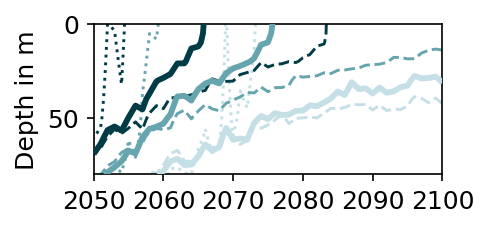

WeddellSea_MPA


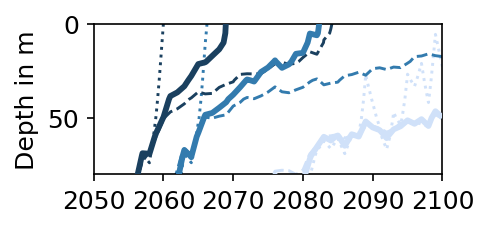

Orkney_MPA


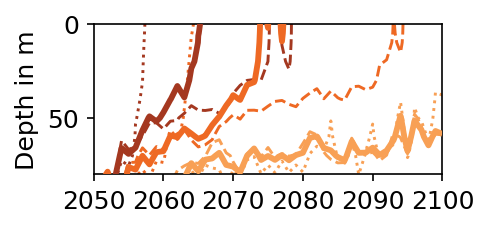

AntarcticPeninsula_MPA


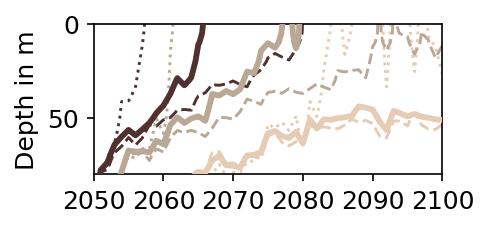

East_Antarctica_all_MPA


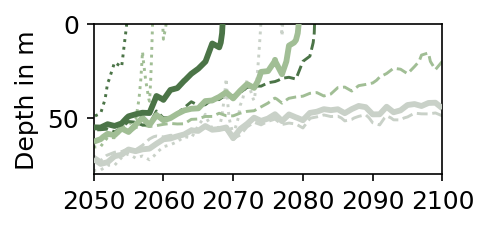

done


In [16]:
#---
# PLOT: depth where omega aragonite is equal to 1 for different seasons, top 80m only 
# (first column in Fig. 7 of paper)
#---

save_plot = False
display_plots = True
plot_eps = False 

sim_list2 = ['SSP5-8.5','SSP3-7.0','SSP2-4.5','SSP1-2.6']

# all subregions in file
subregions = ['all_shelves','WeddellSea','eWeddellSea','Prydz','Adelie','RossSea','Amundsen_Bellingshausen','WAP',\
             'RossSea_MPA','RossSea_MPA_shelf','RossSea_MPA_openOcean',\
              'WeddellSea_MPA','WeddellSea_MPA_shelf','WeddellSea_MPA_openOcean',\
              'Orkney_MPA','AntarcticPeninsula_MPA',\
             'East_Antarctica_1_MPA','East_Antarctica_2_MPA','East_Antarctica_3_MPA','East_Antarctica_all_MPA',\
             'East_Antarctica_1_MPA_shelf','East_Antarctica_2_MPA_shelf',\
              'East_Antarctica_3_MPA_shelf','East_Antarctica_all_MPA_shelf',\
             'East_Antarctica_1_MPA_openOcean','East_Antarctica_2_MPA_openOcean',\
              'East_Antarctica_3_MPA_openOcean','East_Antarctica_all_MPA_openOcean']

# get axes for plotting
depths = np.unique(zlevs)[:-2]
years  = np.arange(1990,2100+1,1)
years_plot = np.tile(years,[len(depths),1])
depths     = np.tile(depths,[len(years),1]).transpose()
print(depths.shape,years_plot.shape)

ind_depths = np.where(np.unique(zlevs)[:-2]<2100)[0]
depths = depths[ind_depths,:]
years_plot = years_plot[ind_depths,:]

ylim1,ylim2 = -2000,0
lw = 2
fs = 12
ls1 = '-'
ls2 = ':'
alpha1 = 0.3
color1 = 'black'#'darkblue'

contour1,contour2,contour3 = 0.75,1,1.25
vv1,vv2 = 0.55,1.45
cmap1 = cm.RdYlBu_r

lw1,lw2 = 1.4,2.8
dpicnt = 150

ls_list = ['--','--',':',':']

for rr in [8,11,14,15,19]: #range(0,len(subregions)):
    print (subregions[rr])

    if subregions[rr] in ['RossSea_MPA','RossSea_MPA_shelf','RossSea_MPA_openOcean']: # pine
        color_plot = cc1
        color_list = color_list1
    elif subregions[rr] in ['East_Antarctica_all_MPA','East_Antarctica_all_MPA_shelf','East_Antarctica_all_MPA_openOcean']: # sage
        color_plot = cc2
        color_list = color_list2
    elif subregions[rr] in ['WeddellSea_MPA','WeddellSea_MPA_shelf','WeddellSea_MPA_openOcean']: # indigo
        color_plot = cc3
        color_list = color_list3
    elif subregions[rr] in ['Orkney_MPA']: # blue
        color_plot = cc4
        color_list = color_list4
    elif subregions[rr] in ['AntarcticPeninsula_MPA']: # warm grey
        color_plot = cc5
        color_list = color_list5
    else:
        color_plot = 'k'
        color_list = color_list6
        
        
    fig, axs = plt.subplots(1,1,figsize=(3,3), dpi=dpicnt,\
                                gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
    plt.subplots_adjust(wspace=0.28)
    plt.subplots_adjust(hspace=0.3) 

    ax1 = plt.subplot2grid((2,1), (0, 0))#, colspan=2)
    
    ax=ax1
    start_year = 60
    
    #----
    # SSP245
    #----
    ax.contour(years_plot[:,start_year:],depths[:,start_year:],data2A[ind_depths,start_year:,rr,-1],\
               [contour2],colors=[color_list[2],color_list[2]],linestyles=['-','--',':'],\
               linewidths=[lw2,lw1],zorder=18)
    for ss in [0,2]:#range(0,4):
        #print season_list[ss]
        ax.contour(years_plot[:,start_year:],depths[:,start_year:],data2A[ind_depths,start_year:,rr,ss],\
               [contour2],colors=[color_list[2],color_list[2]],linestyles=ls_list[ss],\
               linewidths=[lw1])
    
    #----
    # SSP370
    #---- 
    ax.contour(years_plot[:,start_year:],depths[:,start_year:],data3A[ind_depths,start_year:,rr,-1],\
               [contour2],colors=[color_list[1],color_list[1]],linestyles=['-','--',':'],\
               linewidths=[lw2,lw1],zorder=19)
    for ss in [0,2]:#range(0,4):
        #print season_list[ss]
        ax.contour(years_plot[:,start_year:],depths[:,start_year:],data3A[ind_depths,start_year:,rr,ss],\
               [contour2],colors=[color_list[1],color_list[1]],linestyles=ls_list[ss],\
               linewidths=[lw1])
    
    #----
    # SSP585
    #----
    ax.contour(years_plot[:,start_year:],depths[:,start_year:],data4A[ind_depths,start_year:,rr,-1],\
               [contour2],colors=[color_list[0],color_list[0]],linestyles=['-','--',':'],\
               linewidths=[lw2,lw1],zorder=20)
    for ss in [0,2]:#range(0,4):
        ax.contour(years_plot[:,start_year:],depths[:,start_year:],data4A[ind_depths,start_year:,rr,ss],\
               [contour2],colors=[color_list[0],color_list[0]],linestyles=ls_list[ss],\
               linewidths=[lw1])
    
    ax.set_ylim((0,80))
    ax.invert_yaxis()
    ax.set_ylabel('Depth in m',fontsize=fs)
    ax.set_yticks([0,50])
    ax.set_yticklabels([0,50])
    ax.set_xticks([2050,2060,2070,2080,2090,2100])
    ax.set_xticklabels([2050,2060,2070,2080,2090,2100])
    #ax.set_ylim((0,800))
    for label in ax.xaxis.get_majorticklabels():
        label.set_size(fs)
    for label in ax.yaxis.get_majorticklabels():
        label.set_size(fs)
    
    if save_plot:
        plt.savefig(savepath+'Hovmoller_lysocline_depth_insert_'+subregions[rr]+'.png',\
                                        dpi = dpicnt, bbox_inches='tight')  
    if display_plots:
        plt.show()
    else:
        plt.close(fig)
        
        
    if plot_eps: 
        fig, axs = plt.subplots(1,1,figsize=(3,3), dpi=dpicnt,\
                                    gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
        plt.subplots_adjust(wspace=0.28)
        plt.subplots_adjust(hspace=0.3) 

        ax1 = plt.subplot2grid((2,1), (0, 0))#, colspan=2)

        ax=ax1
        start_year = 60

        #----
        # SSP245
        #----
        ax.contour(years_plot[:,start_year:],depths[:,start_year:],data2A[ind_depths,start_year:,rr,-1],\
                   [contour2],colors=[color_list[2],color_list[2]],linestyles=['-','--',':'],\
                   linewidths=[lw2,lw1],zorder=18)
        for ss in [0,2]:#range(0,4):
            #print season_list[ss]
            ax.contour(years_plot[:,start_year:],depths[:,start_year:],data2A[ind_depths,start_year:,rr,ss],\
                   [contour2],colors=[color_list[2],color_list[2]],linestyles=ls_list[ss],\
                   linewidths=[lw1])

        #----
        # SSP370
        #---- 
        ax.contour(years_plot[:,start_year:],depths[:,start_year:],data3A[ind_depths,start_year:,rr,-1],\
                   [contour2],colors=[color_list[1],color_list[1]],linestyles=['-','--',':'],\
                   linewidths=[lw2,lw1],zorder=19)
        for ss in [0,2]:#range(0,4):
            #print season_list[ss]
            ax.contour(years_plot[:,start_year:],depths[:,start_year:],data3A[ind_depths,start_year:,rr,ss],\
                   [contour2],colors=[color_list[1],color_list[1]],linestyles=ls_list[ss],\
                   linewidths=[lw1])

        #----
        # SSP585
        #----
        ax.contour(years_plot[:,start_year:],depths[:,start_year:],data4A[ind_depths,start_year:,rr,-1],\
                   [contour2],colors=[color_list[0],color_list[0]],linestyles=['-','--',':'],\
                   linewidths=[lw2,lw1],zorder=20)
        for ss in [0,2]:#range(0,4):
            ax.contour(years_plot[:,start_year:],depths[:,start_year:],data4A[ind_depths,start_year:,rr,ss],\
                   [contour2],colors=[color_list[0],color_list[0]],linestyles=ls_list[ss],\
                   linewidths=[lw1])

        ax.set_ylim((0,80))
        ax.invert_yaxis()
        #ax.set_ylabel('Depth in m',fontsize=fs)
        ax.set_yticks([0,50])
        ax.set_yticklabels([])
        ax.set_xticks([2050,2060,2070,2080,2090,2100])
        ax.set_xticklabels([])
        #ax.set_ylim((0,800))
        for label in ax.xaxis.get_majorticklabels():
            label.set_size(fs)
        for label in ax.yaxis.get_majorticklabels():
            label.set_size(fs)

        if save_plot:
            plt.savefig(savepath2+'Hovmoller_lysocline_depth_insert_'+subregions[rr]+'.eps',\
                                            dpi = dpicnt, bbox_inches='tight',format='eps') 
        if display_plots:
            plt.show()
        else:
            plt.close(fig)
        
print ('done')



(97, 111) (97, 111)
RossSea_MPA


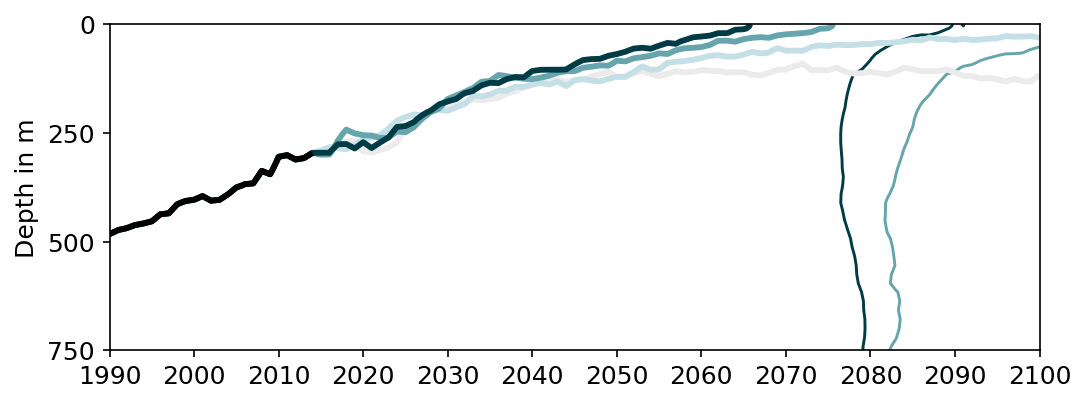

WeddellSea_MPA


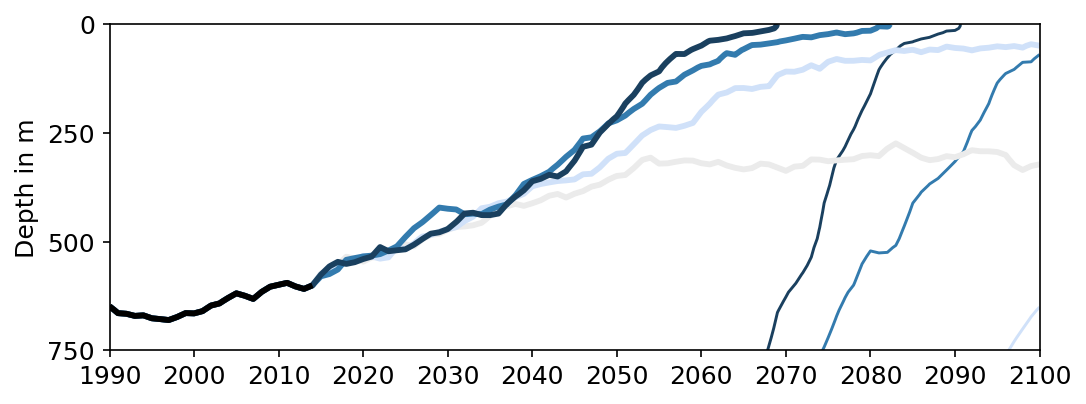

Orkney_MPA


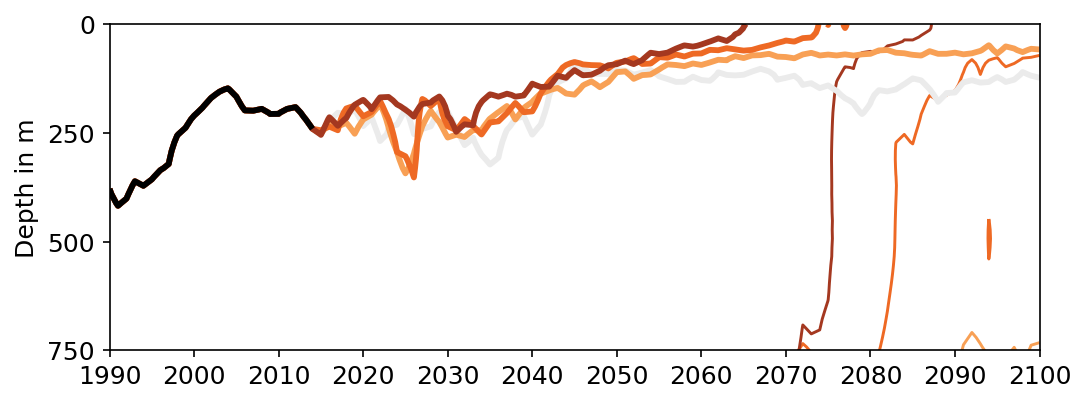

AntarcticPeninsula_MPA


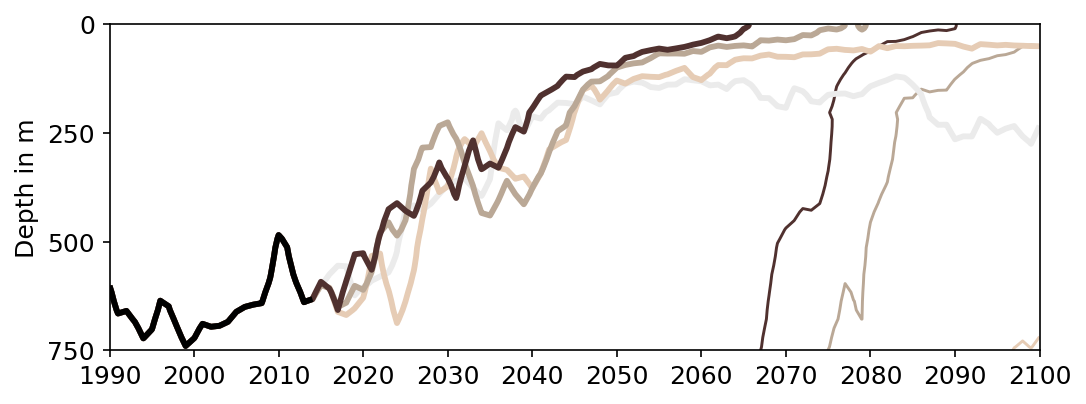

East_Antarctica_all_MPA


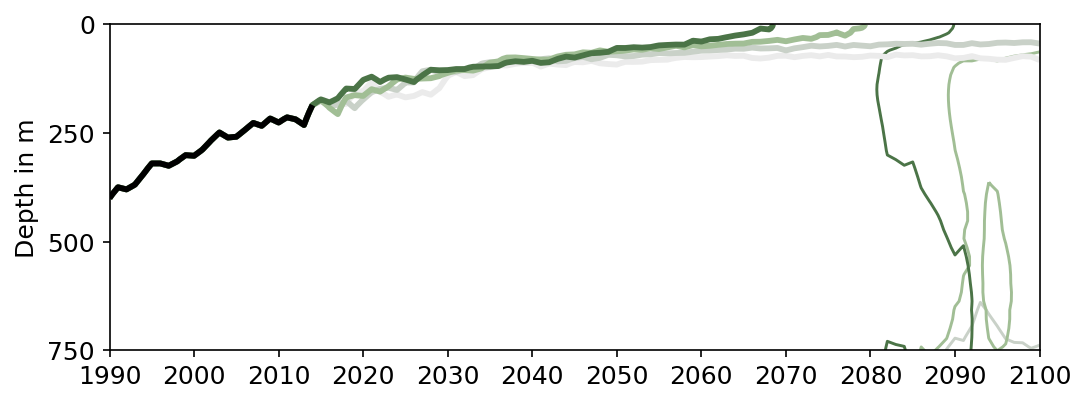

done


In [15]:
#---
# PLOT: depth where omega aragonite is equal to 1 and equal to 0.75, annual mean, top 750m 
# (not shown in paper)
#---

sim_list2 = ['SSP5-8.5','SSP3-7.0','SSP2-4.5','SSP1-2.6']

# all subregions in file
subregions = ['all_shelves','WeddellSea','eWeddellSea','Prydz','Adelie','RossSea','Amundsen_Bellingshausen','WAP',\
             'RossSea_MPA','RossSea_MPA_shelf','RossSea_MPA_openOcean',\
              'WeddellSea_MPA','WeddellSea_MPA_shelf','WeddellSea_MPA_openOcean',\
              'Orkney_MPA','AntarcticPeninsula_MPA',\
             'East_Antarctica_1_MPA','East_Antarctica_2_MPA','East_Antarctica_3_MPA','East_Antarctica_all_MPA',\
             'East_Antarctica_1_MPA_shelf','East_Antarctica_2_MPA_shelf',\
              'East_Antarctica_3_MPA_shelf','East_Antarctica_all_MPA_shelf',\
             'East_Antarctica_1_MPA_openOcean','East_Antarctica_2_MPA_openOcean',\
              'East_Antarctica_3_MPA_openOcean','East_Antarctica_all_MPA_openOcean']

# get axes for plotting
depths = np.unique(zlevs)[:-2]
years  = np.arange(1990,2100+1,1)
years_plot = np.tile(years,[len(depths),1])
depths     = np.tile(depths,[len(years),1]).transpose()
print(depths.shape,years_plot.shape)

ind_depths = np.where(np.unique(zlevs)[:-2]<2100)[0]
depths = depths[ind_depths,:]
years_plot = years_plot[ind_depths,:]

ylim1,ylim2 = -2000,0
lw = 2
fs = 12
ls1 = '-'
ls2 = ':'
alpha1 = 0.3
color1 = 'black'#'darkblue'
    
save_plot = False
display_plots = True
plot_eps = False 
    
contour1,contour2,contour3 = 0.75,1,1.25
vv1,vv2 = 0.55,1.45
cmap1 = cm.RdYlBu_r

lw1,lw2 = 1.4,2.8
dpicnt = 150

for rr in [8,11,14,15,19]: #range(0,len(subregions)):
    print (subregions[rr])

    if subregions[rr] in ['RossSea_MPA','RossSea_MPA_shelf','RossSea_MPA_openOcean']: # pine
        color_plot = cc1
        color_list = color_list1
    elif subregions[rr] in ['East_Antarctica_all_MPA','East_Antarctica_all_MPA_shelf','East_Antarctica_all_MPA_openOcean']: # sage
        color_plot = cc2
        color_list = color_list2
    elif subregions[rr] in ['WeddellSea_MPA','WeddellSea_MPA_shelf','WeddellSea_MPA_openOcean']: # indigo
        color_plot = cc3
        color_list = color_list3
    elif subregions[rr] in ['Orkney_MPA']: # blue
        color_plot = cc4
        color_list = color_list4
    elif subregions[rr] in ['AntarcticPeninsula_MPA']: # warm grey
        color_plot = cc5
        color_list = color_list5
    else:
        color_plot = 'k'
        color_list = color_list6
    
    fig, axs = plt.subplots(1,1,figsize=(8,6.5), dpi=dpicnt,\
                                gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
    plt.subplots_adjust(wspace=0.28)
    plt.subplots_adjust(hspace=0.3) 

    ax1 = plt.subplot2grid((2,1), (0, 0))#, colspan=2)
    
    ax=ax1
    start_year = 0
    # omega=0.75
    ax.contour(years_plot[:,start_year:],depths[:,start_year:],data1A[ind_depths,start_year:,rr,-1],\
               [contour1], colors=[color_list[3],color_list[3]],linestyles=['-','-',':'],\
               linewidths=[lw1,lw2,lw1])
    ax.contour(years_plot[:,start_year:],depths[:,start_year:],data2A[ind_depths,start_year:,rr,-1],\
               [contour1],colors=[color_list[2],color_list[2]],linestyles=['-','-',':'],\
               linewidths=[lw1,lw2,lw1])
    ax.contour(years_plot[:,start_year:],depths[:,start_year:],data3A[ind_depths,start_year:,rr,-1],\
               [contour1],colors=[color_list[1],color_list[1]],linestyles=['-','-',':'],\
               linewidths=[lw1,lw2,lw1])
    ax.contour(years_plot[:,start_year:],depths[:,start_year:],data4A[ind_depths,start_year:,rr,-1],\
               [contour1],colors=[color_list[0],color_list[0]],linestyles=['-','-',':'],\
               linewidths=[lw1,lw2,lw1])
    # omega=1
    ax.contour(years_plot[:,start_year:],depths[:,start_year:],data1A[ind_depths,start_year:,rr,-1],\
               [contour2], colors=[color_list[3],color_list[3]],linestyles=['-','-',':'],\
               linewidths=[lw2,lw1])
    ax.contour(years_plot[:,start_year:],depths[:,start_year:],data2A[ind_depths,start_year:,rr,-1],\
               [contour2],colors=[color_list[2],color_list[2]],linestyles=['-','-',':'],\
               linewidths=[lw2,lw1])
    ax.contour(years_plot[:,start_year:],depths[:,start_year:],data3A[ind_depths,start_year:,rr,-1],\
               [contour2],colors=[color_list[1],color_list[1]],linestyles=['-','-',':'],\
               linewidths=[lw2,lw1])
    ax.contour(years_plot[:,start_year:],depths[:,start_year:],data4A[ind_depths,start_year:,rr,-1],\
               [contour2],colors=[color_list[0],color_list[0]],linestyles=['-','-',':'],\
               linewidths=[lw2,lw1])
    ax.contour(years_plot[:,0:25],depths[:,0:25],data1A[ind_depths,0:25,rr,-1],\
               [contour2], colors=['black','black'],linestyles=['-','-',':'],\
               linewidths=[lw2,lw1])
    
    ax.set_ylim((0,750))
    ax.invert_yaxis()
    ax.set_ylabel('Depth in m',fontsize=fs)
    ax.set_yticks([0,250,500,750])
    ax.set_yticklabels([0,250,500,750]) #[0,'',500]
    ax.set_xticks([1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100])
    ax.set_xticklabels([1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100])
    #ax.set_ylim((0,800))
    for label in ax.xaxis.get_majorticklabels():
        label.set_size(fs)
    for label in ax.yaxis.get_majorticklabels():
        label.set_size(fs)
    if save_plot:
        plt.savefig(savepath+'Hovmoller_lysocline_depth_'+subregions[rr]+'.png',\
                                            dpi = dpicnt, bbox_inches='tight') 
    if display_plots:
        plt.show()
    else:
        plt.close(fig)        
    
            
    if plot_eps: 
        fig, axs = plt.subplots(1,1,figsize=(8,6.5), dpi=dpicnt,\
                                gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
        plt.subplots_adjust(wspace=0.28)
        plt.subplots_adjust(hspace=0.3) 

        ax1 = plt.subplot2grid((2,1), (0, 0))#, colspan=2)

        ax=ax1
        start_year = 0
        # omega=0.75
        ax.contour(years_plot[:,start_year:],depths[:,start_year:],data1A[ind_depths,start_year:,rr,-1],\
                   [contour1], colors=[color_list[3],color_list[3]],linestyles=['-','-',':'],\
                   linewidths=[lw1,lw2,lw1])
        ax.contour(years_plot[:,start_year:],depths[:,start_year:],data2A[ind_depths,start_year:,rr,-1],\
                   [contour1],colors=[color_list[2],color_list[2]],linestyles=['-','-',':'],\
                   linewidths=[lw1,lw2,lw1])
        ax.contour(years_plot[:,start_year:],depths[:,start_year:],data3A[ind_depths,start_year:,rr,-1],\
                   [contour1],colors=[color_list[1],color_list[1]],linestyles=['-','-',':'],\
                   linewidths=[lw1,lw2,lw1])
        ax.contour(years_plot[:,start_year:],depths[:,start_year:],data4A[ind_depths,start_year:,rr,-1],\
                   [contour1],colors=[color_list[0],color_list[0]],linestyles=['-','-',':'],\
                   linewidths=[lw1,lw2,lw1])
        # omega=1
        ax.contour(years_plot[:,start_year:],depths[:,start_year:],data1A[ind_depths,start_year:,rr,-1],\
                   [contour2], colors=[color_list[3],color_list[3]],linestyles=['-','-',':'],\
                   linewidths=[lw2,lw1])
        ax.contour(years_plot[:,start_year:],depths[:,start_year:],data2A[ind_depths,start_year:,rr,-1],\
                   [contour2],colors=[color_list[2],color_list[2]],linestyles=['-','-',':'],\
                   linewidths=[lw2,lw1])
        ax.contour(years_plot[:,start_year:],depths[:,start_year:],data3A[ind_depths,start_year:,rr,-1],\
                   [contour2],colors=[color_list[1],color_list[1]],linestyles=['-','-',':'],\
                   linewidths=[lw2,lw1])
        ax.contour(years_plot[:,start_year:],depths[:,start_year:],data4A[ind_depths,start_year:,rr,-1],\
                   [contour2],colors=[color_list[0],color_list[0]],linestyles=['-','-',':'],\
                   linewidths=[lw2,lw1])
        ax.contour(years_plot[:,0:25],depths[:,0:25],data1A[ind_depths,0:25,rr,-1],\
                   [contour2], colors=['black','black'],linestyles=['-','-',':'],\
                   linewidths=[lw2,lw1])

        ax.set_ylim((0,750))
        ax.invert_yaxis()
        #ax.set_ylabel('Depth in m',fontsize=fs)
        ax.set_yticks([0,250,500,750])
        ax.set_yticklabels([]) #[0,'',500]
        ax.set_xticks([1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100])
        ax.set_xticklabels([])
        #ax.set_ylim((0,800))
        for label in ax.xaxis.get_majorticklabels():
            label.set_size(fs)
        for label in ax.yaxis.get_majorticklabels():
            label.set_size(fs)
        if save_plot:
            plt.savefig(savepath2+'Hovmoller_lysocline_depth_'+subregions[rr]+'.eps',\
                                                dpi = dpicnt, bbox_inches='tight',format='eps') 


print ('done')
    

In [ ]:
print (savepath)